In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import astropy.units as unit
import astropy.constants as cte

#Las dos líneas siguientes son para mostrar las tablas completas tanto en numpy como en pandas
np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_rows", None, "display.max_columns", None)

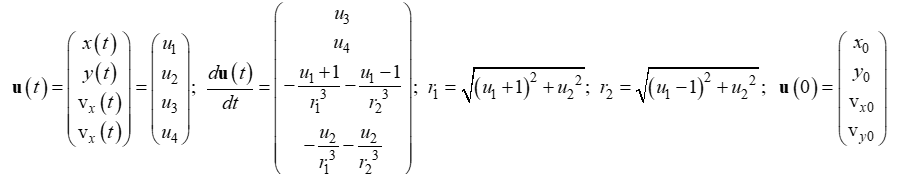

In [2]:
def ax(x,y):
    ax = -(x+1)/ np.sqrt( (x+1)**2 + y**2 )**3 -(x-1)/ np.sqrt( (x-1)**2 + y**2 )**3
    # ax = -(x-1)/ np.sqrt( (x-1)**2 + y**2 )**3
    return ax

def ay(x,y):
    ay = -y/np.sqrt( (x+1)**2 + y**2 )**3 -y/np.sqrt( (x-1)**2 + y**2 )**3
    # ay = -y/np.sqrt( (x-1)**2 + y**2 )**3
    return ay

def Energia(x, y, vx, vy):
    E = 1/2 * (vx**2 + vy**2) - 1/np.sqrt( (x+1)**2 + y**2 ) - 1/np.sqrt( (x-1)**2 + y**2 )
    # E = 1/2 * (vx**2 + vy**2) - 1/np.sqrt( (x-1)**2 + y**2 )
    return E

### Método RK4:

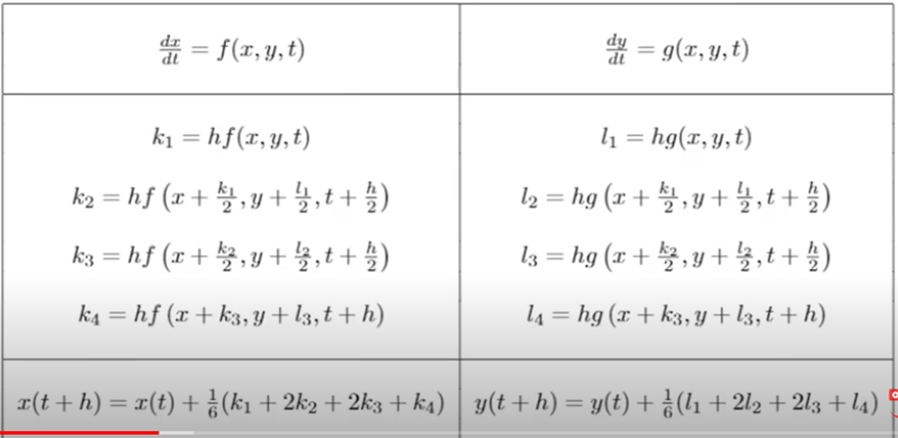

In [3]:
# Juan: Ahora modifique el código para que saque los 4 coeficientes k del RK4 para cada variale: x,y,vx,vy
#       La función siguiente_valor calcula la posición y velocidad siguiente en cada intervalo de tiempo.

def RK4(x0,y0,vx0,vy0):
    x = np.zeros(n); y = np.zeros(n); # Arrays vacíos para posteriormente llenarlos
    x[0] = x0; y[0] = y0;
    
    vx = np.zeros(n); vy = np.zeros(n)
    vx[0] = vx0;vy[0] = vy0;
    
    E = np.zeros(n); E[0] = Energia(x[0], y[0], vx[0], vy[0])
    Error = np.zeros(n)
    
    def siguiente_valor(x,y,vx,vy,h):
        """
        Dado unos datos iniciales en el tiempo t0 está función halla los datos
        en el tiempo t0+h. Para ello emplea 4 RK4 simultaneos, uno para cada variable
        x,y,vx,vy.
        """
        k1 = h*np.array([vx, vy, ax(x,y), ay(x,y)])
        x1 = x + k1[0]/2
        y1 = y + k1[1]/2
        vx1 = vx + k1[2]/2
        vy1 = vy + k1[3]/2
        
        k2 = h*np.array([vx1, vy1, ax(x1,y1), ay(x1,y1)])
        x2 = x + k2[0]/2
        y2 = y + k2[1]/2
        vx2 = vx + k2[2]/2
        vy2 = vy + k2[3]/2
        
        k3 = h*np.array([vx2, vy2, ax(x2,y2), ay(x2,y2)])
        x3 = x + k3[0]
        y3 = y + k3[1]
        vx3 = vx + k3[2]
        vy3 = vy + k3[3]
        
        k4 = h*np.array([vx3, vy3, ax(x3,y3), ay(x3,y3)])
        xf = x + 1/6 * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
        yf = y + 1/6 * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
        vxf = vx + 1/6 * (k1[2] + 2*k2[2] + 2*k3[2] + k4[2])
        vyf = vy + 1/6 * (k1[3] + 2*k2[3] + 2*k3[3] + k4[3])
        return [xf,yf, vxf, vyf]
    
    def siguiente_valor_mejorado(x,y,vx,vy):
        sig0 = np.array(siguiente_valor(x,y,vx,vy,h))       # Cálculo con paso h
        sig1 = np.array(siguiente_valor(x,y,vx,vy,h/2))     # Cálculo 1 con paso h/2
        x1, y1, vx1, vy1 = sig1
        sig2 = np.array(siguiente_valor(x1,y1,vx1,vy1,h/2)) # Cálculo 2 con paso h/2
        Error = abs(sig2-sig0)/15
        return sig2+Error, Error[0]
        
    for i in range(n-1):
        sig, error = siguiente_valor_mejorado(x[i], y[i], vx[i], vy[i])
        Error[i+1] = error
        x[i+1] = sig[0]
        y[i+1] = sig[1]
        vx[i+1] = sig[2]
        vy[i+1] = sig[3]
        E[i+1] = Energia(x[i+1], y[i+1], vx[i+1], vy[i+1])
    
    # Gráfico
    plot(x,y)
    r = np.sqrt(x**2+y**2)
    L = x*vy - y*vx
    df = pd.DataFrame({'t':t, 'x': x, 'y': y, 'vx': vx, 'vy': vy, 'r':r, 'L':L, 'E':E, 'Error':Error})
    return df

def plot(x,y):
    plt.figure(figsize=(13,7))
    plt.style.use('dark_background'); plt.plot(x,y, color="white")
    plt.scatter(1,0, marker=(5, 1), s=200, color="yellow") # Hice que en la gráfica las estrellas se vieran con size=200
    plt.scatter(-1,0, marker=(5, 1), s=200, color="yellow")
    plt.xlim(-2,2); plt.ylim(-2,2) # Límites de los ejes
    plt.show()

In [10]:
def Euler(x0,y0,vx0,vy0):
    x = np.zeros(n); y = np.zeros(n); # Arrays vacíos para posteriormente llenarlos
    x[0] = x0; y[0] = y0;
    vx = np.zeros(n); vy = np.zeros(n)
    vx[0] = vx0;vy[0] = vy0;
    E = np.zeros(n); E[0] = Energia(x[0], y[0], vx[0], vy[0])
    
    def siguiente_valor(x,y,vx,vy):
        """
        Esta función calcula el siguiente valor de posiciones y velocidades usando 
        el método de Euler.
        """
        Fright = h*np.array([vx, vy, ax(x,y), ay(x,y)])
        xf = x + Fright[0]
        yf = y + Fright[1]
        vxf = vx + Fright[2]
        vyf = vy + Fright[3]
        return [xf,yf,vxf,vyf]
    
    for i in range(n-1):
        sig = siguiente_valor(x[i], y[i], vx[i], vy[i])
        x[i+1] = sig[0]
        y[i+1] = sig[1]
        vx[i+1] = sig[2]
        vy[i+1] = sig[3]
        E[i+1] = Energia(x[i+1], y[i+1], vx[i+1], vy[i+1])
    
    # Gráfico
    plot(x,y)
    r = np.sqrt(x**2+y**2)
    L = x*vy - y*vx
    df = pd.DataFrame({'t':t, 'x': x, 'y': y, 'vx': vx, 'vy': vy, 'r':r, 'L':L, 'E':E})
    return df

## Hallando posiciones y velocidades iniciales

In [4]:
"""
Podemos asumir que el planeta gira respecto a una sola estrella como en el sistema solar
para saber cuales escalas de tiempo son las apropiadas. Modifique la variable Rorb para obtener
diferentes orbitas.
"""

R = 15 * unit.au     # Distancia adimensional. Es la distancia Neptuno-Sol/2 (ua = unidad astronómica, distancia Tierra-Sol)
M = unit.M_sun       # Masa del sol
k = cte.G*M/R**2     # Constante de adimensionalización
t_ad = np.sqrt(R/k)  # Tiempo adimensional  

Rorb = 0.05*R       # Radio orbital al que deseamos poner el planeta, medido en unidades de distancia

Vcirc = np.sqrt(cte.G*M / Rorb)  # Velocidad circular
FrecAng = Vcirc/Rorb             # Frecuencia angular
Torb = 2*np.pi/FrecAng           # Periodo orbital

#print('1 tao = ',t_ad.to('d'))
#print('Torb = ',Torb.to('d'))      # T orbital en unidades de días
print('V_ad = ',Vcirc/np.sqrt(k*R)) # Velocidad orbital en unidades adimencionales
print('Rorb_ad = ',Rorb/R)          # Radio orbital en unidades adimensionales
print('Torb_ad = ',Torb/t_ad)       # Periodo orbital en unidades adimensionales
print('h =',Torb/t_ad/100)          # El paso de tiempo perfecto sería el periodo de la orbita sobre 100

V_ad =  4.472135954999579
Rorb_ad =  0.05
Torb_ad =  0.07024814731040725
h = 0.0007024814731040725


x0 debe estar entre: 0.818 y 1.222
Ejemplo: (x0=0.900000, y0=0.162369, vx0=-1.949854, vy0=-1.200880)

Radio orbital:     0.190693
Velocidad orbital: 2.289988
Periodo:           2.743764
10 Periodos:       27.437636
h ideal:           0.027438


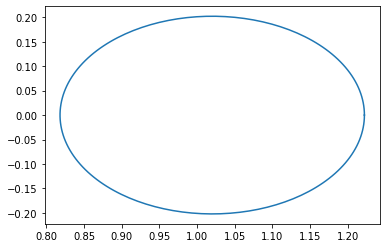

In [5]:
"""
En esta parte trato de buscar condiciones donde r2 < r1
Para ello asumo que r2 = r1 / E siendo E una potencia de 10

Por ejemplo, r2 = r1 /10^2, con lo cual la distancia r2 es mucho más pequeña que r1,
permitiendo despreciar la fuerza de la estrella M1.

Se define como constante K = (E**2 + 1) / (E**2 - 1)
Se toma la definición de r2 como r2=np.sqrt((x0-1)**2+y0**2) y lo mismo para r1
Al manipular las ecuaciones se llega a:

x0**2 - 2*K*x0 + 1 + y0**2 = 0

(x0-K)**2 + y0**2 = K**2 - 1

Que es la ecuación de una circunferencia con centro en (K,0) y radio np.sqrt(K**2 - 1)
K toma valores entre (1,inf). Siendo K=1 el menor valor y donde la circunferencia se 
degenera en un punto.

Como resultado se muestra la circunferencia. Cada punto de esta representa una posición 
inicial donde se cumple la condición de r2 = r1/E
"""

p = 1        # Potencia que se desea aplicar
E = 10**p      # Constante E
K = (E**2 + 1) / (E**2 - 1)       # Constante K
t = np.linspace(0,2*np.pi,200)    # Variable auxiliar que varia de 0 a 2pi radianes
x = K + np.sqrt(K**2-1)*np.cos(t) # posiciones en x de la circunferencia
y = np.sqrt(K**2-1)*np.sin(t)     # posiciones en y de la circunferencia
plt.plot(x,y)
print('x0 debe estar entre: %.3f y %.3f'%(K-np.sqrt(K**2-1),K+np.sqrt(K**2-1)))

"""
A continuación hago un ejemplo tomando las velocidades apropiadas para obtener una orbita
circular alrededor de la estrella y estimando el periodo orbital. La estrella a la que se orbita es
a la de la posición (1,0)
"""

x0 = 0.9                      # Defino la condición inicial x0
y0 = np.sqrt(K**2-1-(x0-K)**2)  # Encuentro el y0 correspondiente

Rorb = np.sqrt((x0-1)**2+y0**2) # Defino el radio orbital como la distancia inicial del planeta a la estrella
vorb = np.sqrt(1/Rorb)          # Calculo la velocidad orbital
theta = np.arctan2(y0,(x0-1))   # El angulo que tiene el planeta respecto al eje x 
                                # (tomando un marco con el origen en la estrella)
vx0 = -vorb*np.sin(theta)        # Velocidad en x
vy0 =  vorb*np.cos(theta)        # Velocidad en y

Torb = 2*np.pi*np.sqrt(Rorb)    # Calculo el periodo orbital
n = 10

print('Ejemplo: (x0=%.6f, y0=%.6f, vx0=%.6f, vy0=%.6f)'%(x0,y0,vx0,vy0))
print()
print('Radio orbital:     %.6f'%(Rorb))
print('Velocidad orbital: %.6f'%(vorb))
print('Periodo:           %.6f'%(Torb))
print('%d Periodos:       %.6f'%(n,n*Torb))
print('h ideal:           %.6f'%(Torb/100))

## (RK4) Fijando condiciones iniciales y corriendo código

In [14]:
#dat = RK4(x0=0.9, y0=0, vx0=0, vy0=3.162277660168379)
#dat = RK4(x0=0.8, y0=0, vx0=0, vy0=2.2360679774997894)
#dat = RK4(x0=0.6, y0=0, vx0=0, vy0=2)
#dat = RK4(x0=0, y0=0, vx0=0.5, vy0=1)
#dat = RK4(x0=0, y0=0, vx0=0.7, vy0=0.7) #Leminiscata casi perfecta
#dat = RK4(x0=0.95, y0=0, vx0=0, vy0=4.472135954999579)

#dat = RK4(x0=0.98, y0=0.059, vx0=0, vy0=4.472135954999579)
#dat = RK4(x0=0.980000, y0=0.059363, vx0=-3.786368, vy0=-1.275674)

#a=0; b=10; h=0.001; t = np.arange(a, b+h, h); n = len(t)
#dat = RK4(x0=0.900272, y0=0.000000, vx0=-0.000000, vy0=-3.166592) 

#a=0; b=10; h=0.0001; t = np.arange(a, b+h, h); n = len(t)
#dat = RK4(x0=0.900000, y0=0.162369, vx0=-1.949854, vy0=-1.200880) 

#dat.head(6)

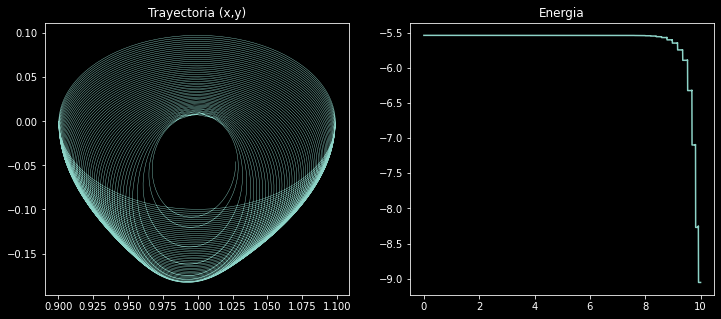

In [7]:
## Obtener datos
t = dat['t'].values; E = dat['E'].values
x = dat['x'].values; y = dat['y'].values
vx = dat['vx'].values; vy = dat['vy'].values
Error = dat['Error'].values

## Graficas
t_0 = 0; t_f = 10
c0 = int(t_0/h)  # Intervalo inicial para graficar
cf = int(t_f/h)  # Intervalo final

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x[c0:cf],y[c0:cf],lw=0.4); plt.title('Trayectoria (x,y)')
#plt.plot(x[:int(0.02*n)],y[:int(0.02*n)],color='red',lw=1);
#plt.plot(x[int(0.8*n):int(0.808*n)],y[int(0.8*n):int(0.808*n)],color='blue',lw=1);
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.subplot(122)
#plt.plot(t[c0:cf],vy[c0:cf]**2+vx[c0:cf]**2); plt.title('rapidez al cuadrado')
plt.plot(t[c0:cf],E[c0:cf]); plt.title('Energia')
plt.show()

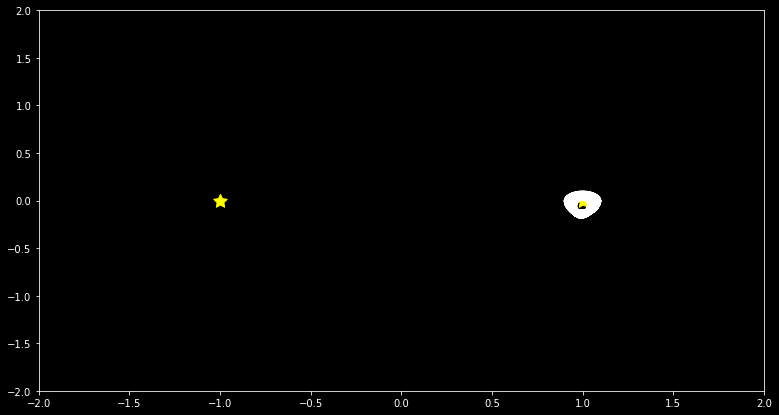

In [8]:
try:
    count += 1
except:
    count = 1
plt.figure(figsize=(13,7))
plt.style.use('dark_background'); plt.plot(x,y, color="white")
plt.scatter(1,0, marker=(5, 1), s=200, color="yellow") # Hice que en la gráfica las estrellas se vieran con size=200
plt.scatter(-1,0, marker=(5, 1), s=200, color="yellow")
plt.xlim(-2,2); plt.ylim(-2,2) # Límites de los ejes
#plt.savefig(f'RK4_{count}.png',dpi=300)
plt.show()

## (Euler) Fijando condiciones iniciales y corriendo código

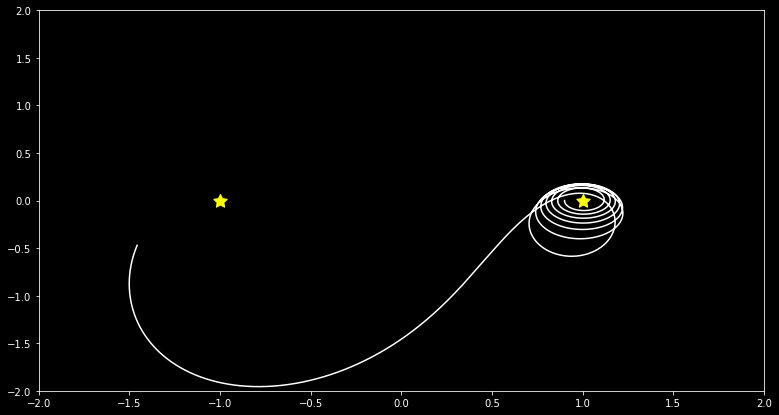

In [11]:
a=0; b=10; h=0.001; t = np.arange(a, b+h, h); n = len(t)
dat = Euler(x0=0.900272, y0=0.000000, vx0=-0.000000, vy0=-3.166592)

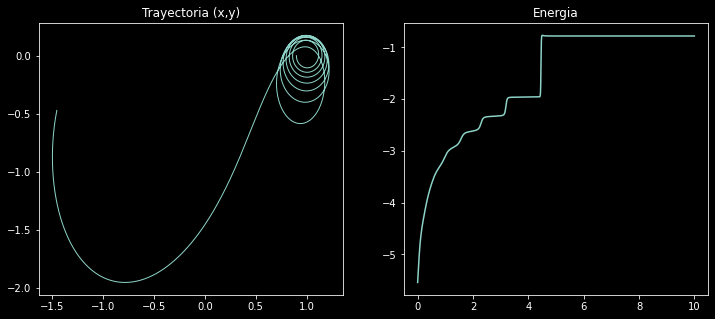

In [13]:
## Obtener datos
t = dat['t'].values; E = dat['E'].values
x = dat['x'].values; y = dat['y'].values
vx = dat['vx'].values; vy = dat['vy'].values

## Graficas
t_0 = 0; t_f = 10
c0 = int(t_0/h)  # Intervalo inicial para graficar
cf = int(t_f/h)  # Intervalo final

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x[c0:cf],y[c0:cf],lw=1); plt.title('Trayectoria (x,y)')
#plt.plot(x[:int(0.02*n)],y[:int(0.02*n)],color='red',lw=1);
#plt.plot(x[int(0.8*n):int(0.808*n)],y[int(0.8*n):int(0.808*n)],color='blue',lw=1);
#plt.xlim(-2,2); plt.ylim(-2,2)
plt.subplot(122)
#plt.plot(t[c0:cf],vy[c0:cf]**2+vx[c0:cf]**2); plt.title('rapidez al cuadrado')
plt.plot(t[c0:cf],E[c0:cf]); plt.title('Energia')
plt.show()